In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import loompy
import cytograph as cg
%config InlineBackend.figure_format = 'retina'

In [10]:
def violin(gene):
    celltypes = [
        "VECV",
        "VECC",
        "PER2",
        "PER1",
        "VSMCA",
        "PER3",
        "VECA",
        "VLMC1",
        "VLMC2",
        "ABC",
        "ENVLMC",
        "ENTG7",
        "ENTG6",
        "ENTG5",
        "ENTG4",
        "ENTG3",
        "ENTG2",
        "ENTG1",
        "SATG1",
        "SATG2",
        "SCHW",
        "OPC",
        "OEC",
    ]
    colors = [
        "#D3A7A8",
        "#D3A7A8",
        "#252513",
        "#252513",
        "#D35085",
        "#D35085",
        "#D35085",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#A4BEE3",
        "#A4BEE3",
        "#A20088",
        "#F7941D",
        "#009444"
    ]
    with loompy.connect("/Users/sten/build_20171205/L5_All.loom") as ds:
        #print(np.unique(ds.ca.ClusterName))
        d = []
        data = np.log2(ds[ds.ra.Gene == gene, :] + 1)
        for celltype in celltypes:
            print(celltype, (ds.ca.ClusterName == celltype).sum())
            if (ds.ca.ClusterName == celltype).sum() == 0:
                raise ValueError(celltype + " not found!")
            vals = data[:, ds.ca.ClusterName == celltype][0] 
            nnz = vals > 0
            vals[nnz] = vals[nnz] + np.random.uniform(size=nnz.sum())
            d.append(vals)
        plt.figure(figsize=(len(celltypes),1))
        ax = plt.subplot(111)
        ax.set_axis_off()
        violin_parts = plt.violinplot(d, showmeans=False, showmedians=False, showextrema=False)
        for ix, pc in enumerate(violin_parts['bodies']):
            pc.set_alpha(1)
            pc.set_facecolor(colors[ix])
            pc.set_linewidth(0.5)
            pc.set_edgecolor('black')
        #plt.text(x=0, y=1, s=gene, color='black', fontsize=10, alpha=0.7, horizontalalignment='right')
        #for ix, celltype in enumerate(celltypes):
        #    plt.text(x=ix+1, y=-1, s=celltype, color='black', fontsize=8, alpha=0.7, rotation=45, horizontalalignment='right')
        plt.savefig("/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/" + gene + "_burst.png", dpi=600, transparent=True, bbox_inches='tight')
        plt.close()

In [11]:
violin("Sox10")

VECV 2780
VECC 1025
PER2 488
PER1 4725
VSMCA 1221
PER3 298
VECA 109
VLMC1 702
VLMC2 662
ABC 137
ENVLMC 49
ENTG7 1041
ENTG6 811
ENTG5 1132
ENTG4 4044
ENTG3 1135
ENTG2 2160
ENTG1 163
SATG1 30
SATG2 654
SCHW 47
OPC 820
OEC 2031


In [9]:
genes = [
    "Sox10", "Foxd3", "Aldh1a3", "Anxa11", "Slc18a2", "Klhl30", "Gfra3", "Dcn", "Lum",
    "Pdgfra", "Cldn19", "Gldn", "Dhrs2", "Ceacam10", "Cspg4", "Cspg5", "Olig1", "Pcdh15", "Aldoc",
    "Npy", "Vtn"
]
for gene in genes:
    violin(gene)

In [37]:
with loompy.connect("/Users/sten/build_20171205/L5_All.agg.loom") as ds:
    for g in ds.ra.Gene:
        if g.startswith("Un"):
            print(g)


Unc5b
Uncx
Unc5c
Unc13c
Unc5a
Unc5d
Unc13b
Unc119
Unc5cl
Unc45b
Unc93a
Unc93b1
Ung
Unk
Unc13d
Unc80
Unc45a
Unc119b
Unc13a
Unc50
Unc79
Unkl


In [45]:
def burst(celltypes, genes, colors, fname):
    with loompy.connect("/Users/sten/build_20171205/L5_All.agg.loom") as dsagg:
        cols = dsagg.ca.ClusterName
        trinaries = dsagg["trinaries"][:,:]
    with loompy.connect("/Users/sten/build_20171205/L5_All.loom") as ds:
        plt.figure(figsize=(len(celltypes)/3,len(genes)/3))
        for i,gene in enumerate(genes):
            print(gene)
            ax = plt.subplot(len(genes), 1, len(genes) - i)
            ax.set_axis_off()
            d = []
            data = np.log2(ds[ds.ra.Gene == gene, :] + 1)
            for j, celltype in enumerate(celltypes):
                if (ds.ca.ClusterName == celltype).sum() == 0:
                    raise ValueError(celltype + " not found!")
                vals = data[:, ds.ca.ClusterName == celltype][0]
                if vals.shape[0] > 100:
                    vals = np.random.choice(vals, size=100, replace=False)
                nnz = vals > 0
                vals[nnz] = vals[nnz] + np.random.uniform(size=nnz.sum())
                vals[~nnz] = vals[~nnz] + np.random.uniform(size=(~nnz).sum()) * 0.5
                color = colors[j]
                alpha=1
                if trinaries[ds.ra.Gene == gene, :][:, cols == celltype] < 0.5:
                    color = "#DDDDDD"
                    #alpha=0.1
                plt.scatter(x=np.random.uniform(low=-0.5,high=0.25,size=vals.shape[0]) + j, y=vals, c=color, marker='.', s=10, alpha=alpha)
                if i == 0:
                    plt.text(x=j, y=-10, s=celltype, color='black', fontsize=11, alpha=0.7,  horizontalalignment='right')
            plt.text(x=-1, y=0, s=gene, color='black', fontsize=15, alpha=0.7, horizontalalignment='right')
        if fname is not None:
            plt.savefig(fname, dpi=600, transparent=True, bbox_inches='tight', pad_inches=0)
            plt.close()

Cldn5
Adgrf5
Emcn
Vtn
Cspg4
Atp13a5
Pth1r
Kcnj8
Abcc9
Apln
Cd82
Chst1
Tagln
Pln
Bmx
Gkn3
Igfbp2
Dcn
Lum
Pdgfra
Il33
Ptgds
Nnat
Rspo3
Nov
Slc47a1
Sox10
Foxd3
Aldh1a3
Anxa11
Slc18a2
Klhl30
Gfra3
Cldn19
Mpz
Dhrs2
Ceacam10
Cspg5
Olig1
Pcdh15
Aldoc
Npy
Apod


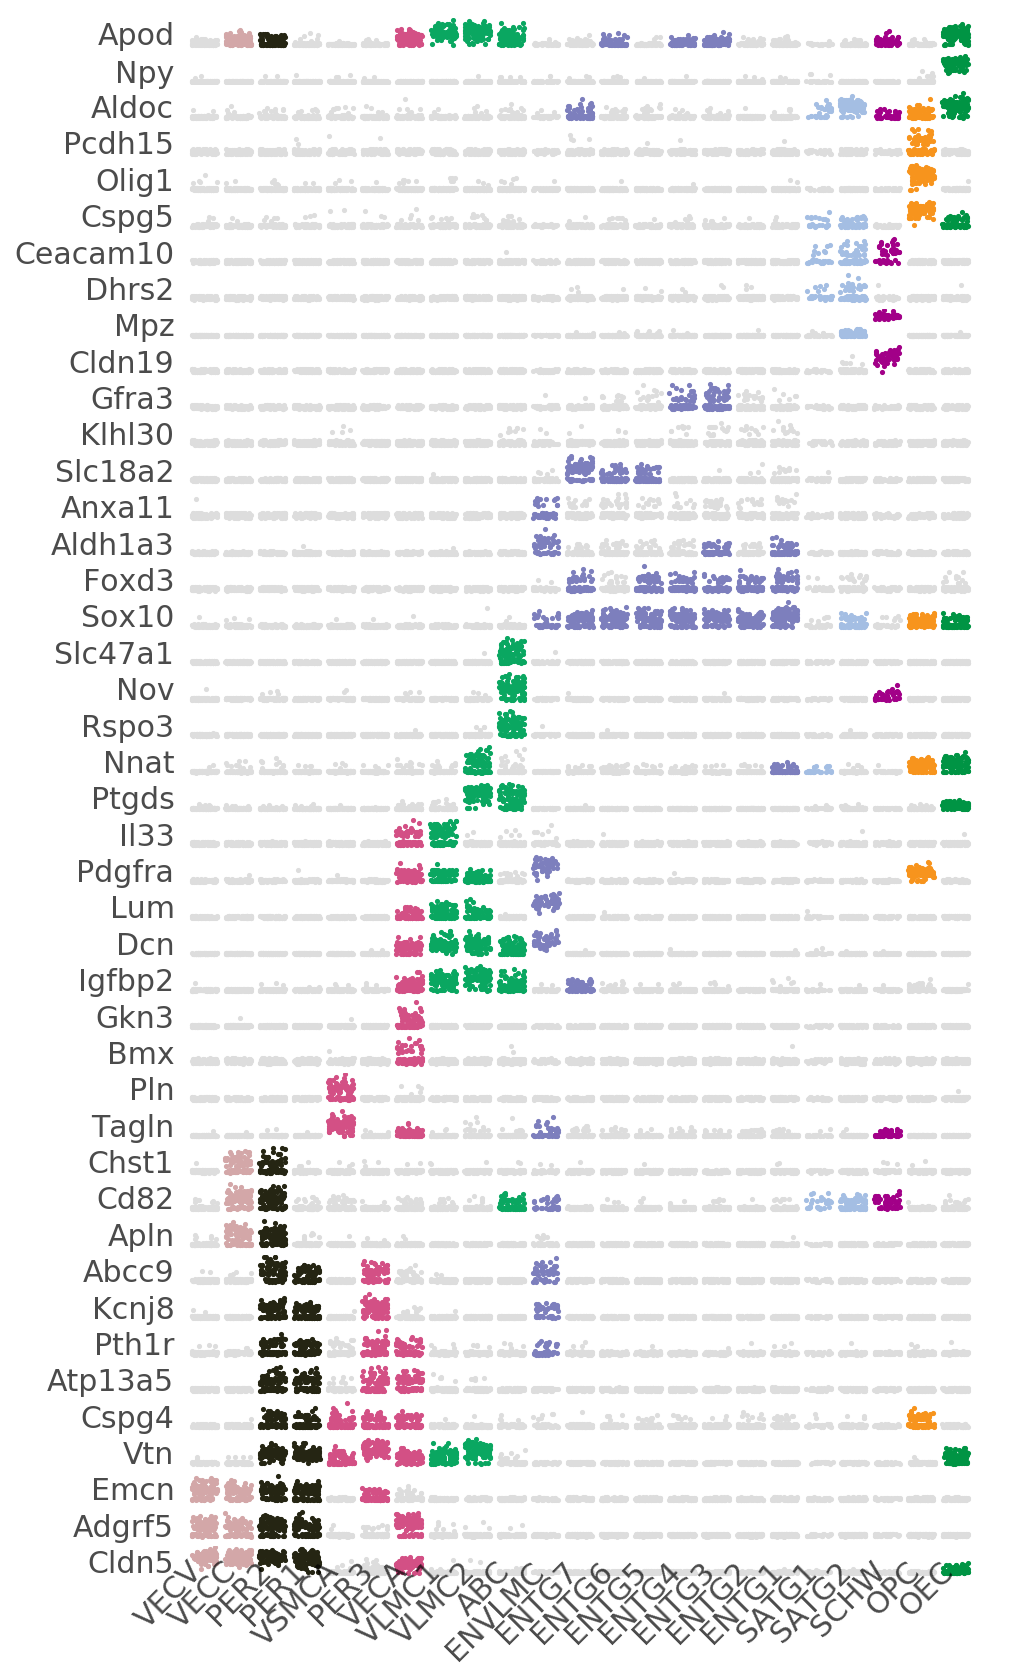

In [20]:
celltypes = [
        "VECV",
        "VECC",
        "PER2",
        "PER1",
        "VSMCA",
        "PER3",
        "VECA",
        "VLMC1",
        "VLMC2",
        "ABC",
        "ENVLMC",
        "ENTG7",
        "ENTG6",
        "ENTG5",
        "ENTG4",
        "ENTG3",
        "ENTG2",
        "ENTG1",
        "SATG1",
        "SATG2",
        "SCHW",
        "OPC",
        "OEC",
    ]
genes = [
    "Cldn5", "Adgrf5", "Emcn", "Vtn", "Cspg4", "Atp13a5", "Pth1r", "Kcnj8", "Abcc9", "Apln", "Cd82", "Chst1",
    "Tagln", "Pln", "Bmx", "Gkn3", "Igfbp2", "Dcn", "Lum",
    "Pdgfra",  "Il33", "Ptgds", "Nnat", "Rspo3", "Nov", "Slc47a1",
    "Sox10", "Foxd3", "Aldh1a3", "Anxa11", "Slc18a2", "Klhl30", "Gfra3", "Cldn19", "Mpz", "Dhrs2", "Ceacam10", "Cspg5", "Olig1", "Pcdh15", "Aldoc",
    "Npy", "Apod"
]
colors = [
    "#D3A7A8",
    "#D3A7A8",
    "#252513",
    "#252513",
    "#D35085",
    "#D35085",
    "#D35085",
    "#0AA761",
    "#0AA761",
    "#0AA761",
    "#7D7FBD",
    "#7D7FBD",
    "#7D7FBD",
    "#7D7FBD",
    "#7D7FBD",
    "#7D7FBD",
    "#7D7FBD",
    "#7D7FBD",
    "#A4BEE3",
    "#A4BEE3",
    "#A20088",
    "#F7941D",
    "#009444",

]
burst(celltypes, genes, colors, "/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/Neural_crest_like.png")

In [5]:
celltypes = [
        "VECV",
        "VECC",
        "PER2",
        "PER1",
        "VSMCA",
        "PER3",
        "VECA",
        "VLMC1",
        "VLMC2",
        "ABC",
        "ENVLMC",
        "ENTG7",
        "ENTG6",
        "ENTG5",
        "ENTG4",
        "ENTG3",
        "ENTG2",
        "ENTG1",
        "SATG1",
        "SATG2",
        "SCHW",
        "OPC",
        "OEC",
    ]
genes = [
    "Cldn5", "Adgrf5", "Emcn", "Vtn", "Cspg4", "Atp13a5", "Pth1r", "Kcnj8", "Abcc9", "Apln", "Cd82", "Chst1",
    "Tagln", "Pln", "Bmx", "Gkn3", "Igfbp2", "Dcn", "Lum",
    "Pdgfra",  "Il33", "Ptgds", "Nnat", "Rspo3", "Nov", "Slc47a1",
    "Sox10", "Foxd3", "Snai1", "Snai2", "Slc18a2", "Klhl30", "Gfra3", "Cldn19", "Mpz", "Dhrs2", "Ceacam10", "Cspg5", "Olig1", "Pcdh15", "Aldoc",
    "Npy", "Apod"
]
colors = [
        "#D3A7A8",
        "#D3A7A8",
        "#252513",
        "#252513",
        "#D35085",
        "#D35085",
        "#D35085",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#A4BEE3",
        "#A4BEE3",
        "#A20088",
        "#F7941D",
        "#009444",

    ]
burst(celltypes, genes, colors, "/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/Neural_crest_like_OPCs.png")

Cldn5
Adgrf5
Emcn
Vtn
Cspg4
Atp13a5
Pth1r
Kcnj8
Abcc9
Apln
Cd82
Chst1
Tagln
Pln
Bmx
Gkn3
Igfbp2
Dcn
Lum
Pdgfra
Il33
Ptgds
Nnat
Rspo3
Nov
Slc47a1
Sox10
Foxd3
Snai1
Snai2
Slc18a2
Klhl30
Gfra3
Cldn19
Mpz
Dhrs2
Ceacam10
Cspg5
Olig1
Pcdh15
Aldoc
Npy
Apod


In [31]:
celltypes = [
    "PSNP6",
    "PSNP5",
    "PSNP4",
    "PSNP3",
    "PSNP2",
    "PSNP1",
    "PSNF1",
    "PSNF2",
    "PSNF3",
    "PSPEP1",
    "PSPEP3",
    "PSPEP4",
    "PSPEP2",
    "PSPEP5",
    "PSPEP6",
    "PSPEP7",
    "PSPEP8",
    "SYCHO1",
    "SYCHO2",
    "SYNOR5",
    "SYNOR4",
    "SYNOR3",
    "SYNOR2",
    "SYNOR1",
    "ENT9",
    "ENT8",
    "ENT7",
    "ENT6",
    "ENT5",
    "ENT4",
    "ENT3",
    "ENT2",
    "ENT1"
    ]

genes = [
    "Etv1",
    "Gal",
    "Cartpt",
    "Nos1",
    "Cox8b",
    "Col12a1",
    "Ly6e",
    "Tac1",
    "Trps1",
    "Scgn",
    "Ucn3",
    "Nmu",
    "Nog",
    "Htr3a",
    "Brinp1",
    "Ccne1",
    "Hcrtr1",
    "Cyp2j12",
    "Pthlh",
    "Ltk",
    "Ctla2a",
    "Vip",
    "Slc18a3",
    "Gda",
    "Pcdh19",
    "Angpt4",
    "Prrx2",
    "Dcdc2a",
    "Itk",
    "Sertm1",
    "Cgnl1",
    "Ntm",
    "Cadps2",
    "Pvalb",
    "Gprc5b",
    "Ptgfr",
    "Cd34",
    "Pkib",
    "Lpar3",
    "Otoa",
    "Car8",
    "Nppb",
#    "Nmu","Scgn","Grp","Penk","Cckar","Tac1","Dmkn", "Nos1","Gal","Cck","Vip","Npy","Cartpt","Ngb"
]
colors = [
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
        "#F7941D",
    
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#0AA761",
        "#0AA761",

        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD",
        "#7D7FBD"
]
genes.reverse()
burst(celltypes, genes, colors, "/Users/sten/Dropbox (Linnarsson Group)/linnarsson group/Manuscripts/Whole brain/Figures/Figure_parts/neural_Crest_Like_and_vascular_Figure/Peripheral_neurons.png")

Nppb
Car8
Otoa
Lpar3
Pkib
Cd34
Ptgfr
Gprc5b
Pvalb
Cadps2
Ntm
Cgnl1
Sertm1
Itk
Dcdc2a
Prrx2
Angpt4
Pcdh19
Gda
Slc18a3
Vip
Ctla2a
Ltk
Pthlh
Cyp2j12
Hcrtr1
Ccne1
Brinp1
Htr3a
Nog
Nmu
Ucn3
Scgn
Trps1
Tac1
Ly6e
Col12a1
Cox8b
Nos1
Cartpt
Gal
Etv1


Trpv6
Trpv4
Trpv3
Trpv2
Trpv1
Trpt1
Trps1
Trpm8
Trpm7
Trpm6
Trpm4
Trpm3
Trpm2
Trpm1
Trpc7
Trpc6
Trpc5
Trpc4ap
Trpc4
Trpc3
Trpc1
Trpa1


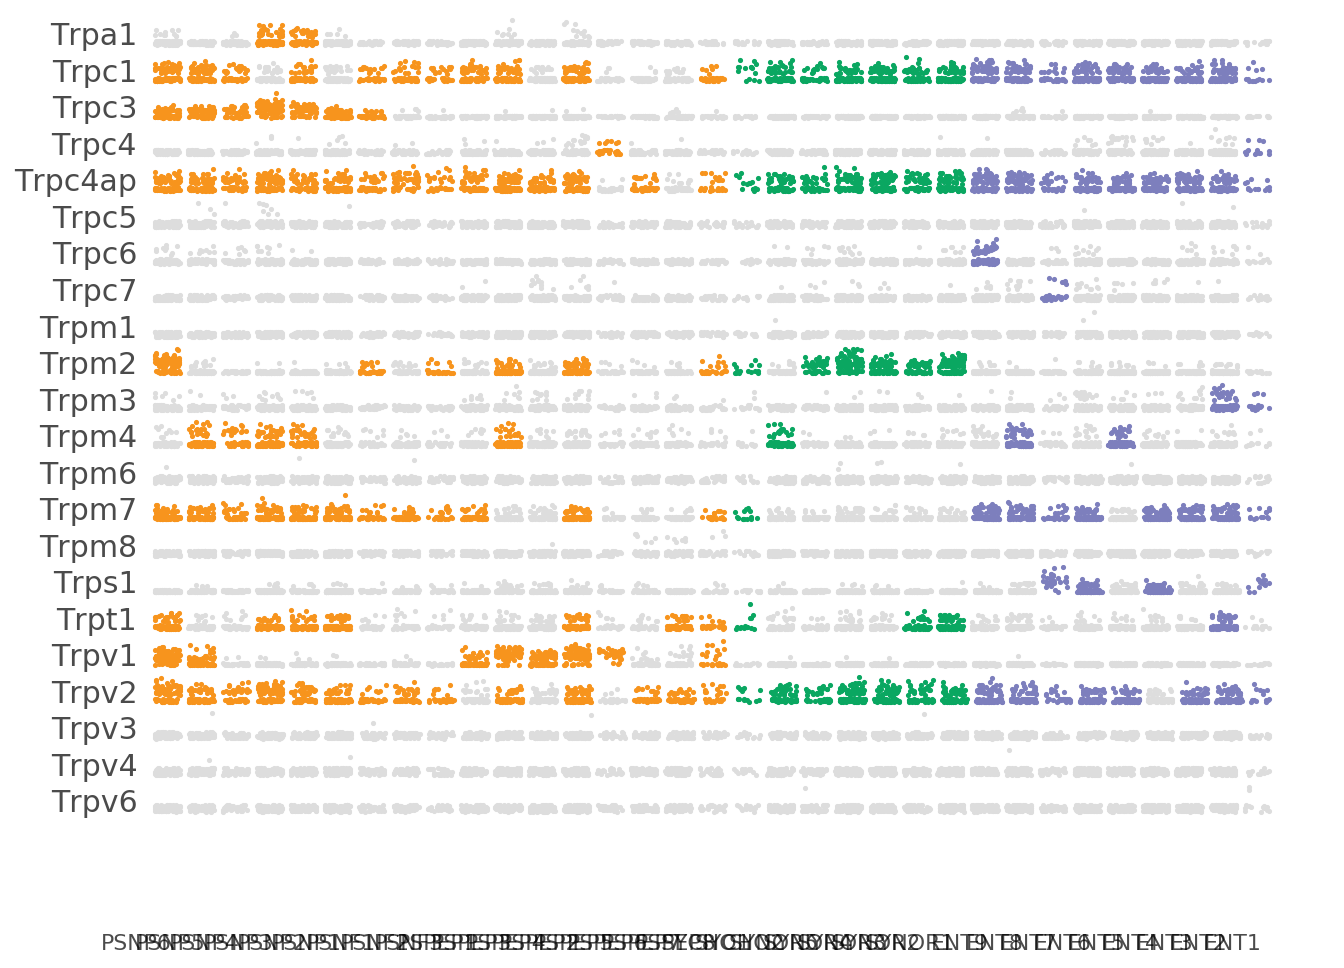

In [49]:
genes=[
"Trpc7",
"Trpc5",
"Trpc4",
"Trpm4",
"Trpc3",
"Trpv1",
"Trps1",
"Trpc6",
#"Trpc2",
#"Trpd52l3",
"Trpm3",
"Trpv4",
#"Trp53",
"Trpm6",
"Trpv3",
"Trpm8",
"Trpm7",
"Trpc4ap",
"Trpc1",
#"Trpc5os",
"Trpv2",
"Trpa1",
"Trpt1",
#"Trpv5",
"Trpm2",
"Trpv6",
"Trpm1",
#"Trpm5",
]
burst(celltypes, sorted(genes, reverse=True), colors, None)